<a href="https://colab.research.google.com/github/aguusandy/ic_2023/blob/master/inteligencia_guia4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guia 4 Práctica IC 2023


## Ejercicio 1:
Implemente el algoritmo de
entrenamiento de un SOM bidimensional de forma que se pueda ver graficamente el mapa topologico durante todo el proceso. Para poder observar el ordenamiento topologico, en el mapa grafique lıneas de union entre pares de neuronas vecinas. Realice las pruebas de ordenamiento topologico con los patrones provistos en los archivos circulo.csv y te.csv, usando un maximo de 1000 epocas de entrenamiento. Dichos datos fueron generados aleatoriamente con distribucion uniforme dentro de las siguientes figuras planas:
i) un cırculo de radio 1 centrado en el origen;
ii) una T como muestra la figura.


In [1]:
# importamos los datos
import numpy as np
import matplotlib.pyplot as plt

datos_circulo = np.genfromtxt("circulo.csv", delimiter="," , skip_header=1)
datos_te = np.genfromtxt("te.csv", delimiter="," , skip_header=1)

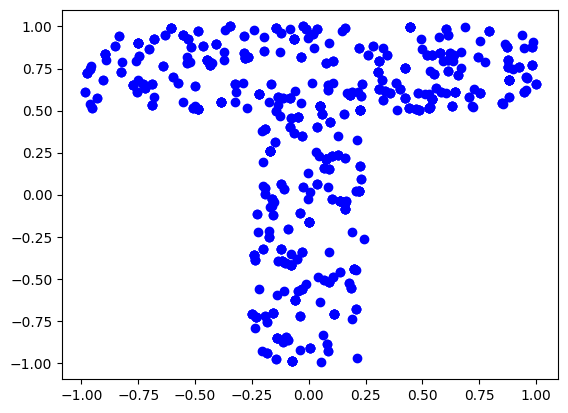

In [2]:
for i in np.arange(0,len(datos_te)):
  plt.plot(datos_te[i][0],datos_te[i][1],'bo')
plt.show()

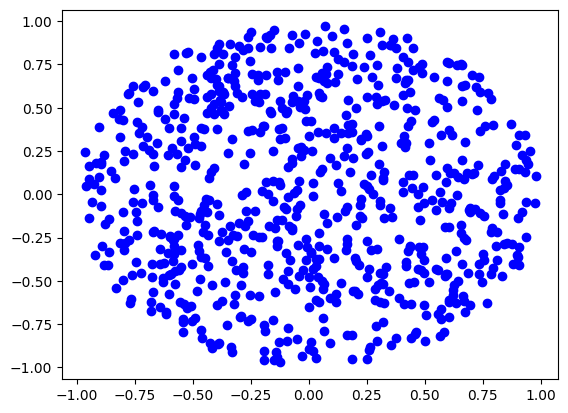

In [3]:
for i in np.arange(0,len(datos_circulo)):
  plt.plot(datos_circulo[i][0],datos_circulo[i][1],'bo')
plt.show()

In [4]:
# definimos algunas variables de utilidad
red_size = 7
data_size_circulo = len(datos_circulo)
data_size_te = len(datos_te)


In [11]:
# definimos el array de pesos
def crear_pesos(red_size,dimension_data,tipo):
  if tipo == 0:
    tamaño = red_size
  else:
    tamaño = 1
  pesos = np.full(tamaño,None)
  for i in np.arange(0,tamaño):
    pesos[i] = np.random.rand(red_size,dimension_data)-0.5
  return pesos
#print(pesos_ej1)

In [44]:
# funcion que busca el peso minimo entre un array de pesos y un unico patron,
# devuelve el indice en i y en j de la neurona elegida
def nodo_min_dist(pesos, patron,size_pesos):
  minimos =  np.full([len(pesos),2],None)
  distancia_v = np.full(size_pesos,None)
  for i in np.arange(0,len(pesos)):
    for j in np.arange(0,len(distancia_v)):
      distancia_v[j] = np.linalg.norm(pesos[i][j]-patron,2)
    ind_min = np.argmin(distancia_v)
    minimos[i] = [ind_min,distancia_v[ind_min]]
  ind_i = np.argmin(minimos[:,1])
  ind_j = minimos[ind_i,0]
  return ind_i,ind_j

In [7]:
def plot_neuronas(nodos,iteracion):
  # plot(x, y, color='green', marker='o', linestyle='dashed',linewidth=2)
  #print(nodos[1])
  plt.clf()
  plt.title('Vecindad para la iteracion '+str(iteracion))
  #plt.xlim([-0.5,1.5])
  #plt.ylim([-0.5,1.5])
  plt.xlabel('Posicion en x')
  plt.ylabel('Posicion en y')
  # ploteo solo los nodos de la vecindad
  for i in np.arange(0,len(nodos)):
    nodo = nodos[i]
    for j in np.arange(0,len(nodo)):
       plt.plot(nodo[j][0],nodo[j][1],'ko')
  # ploteo las relaciones entre vecinos
  for i in np.arange(0,len(nodos)):
    if i == len(nodos)-1:
      for j in np.arange(0,len(nodos)-1):
        plt.plot([nodos[i][j][0],nodos[i][j+1][0]],[nodos[i][j][1],nodos[i][j+1][1]],'r-')
    else:
      for j in np.arange(0,len(nodos)):
        if j == len(nodos)-1:
          plt.plot([nodos[i][j][0],nodos[i+1][j][0]],[nodos[i][j][1],nodos[i+1][j][1]],'r-')
        else:
          plt.plot([nodos[i][j][0],nodos[i+1][j][0]],[nodos[i][j][1],nodos[i+1][j][1]],'r-')
          plt.plot([nodos[i][j][0],nodos[i][j+1][0]],[nodos[i][j][1],nodos[i][j+1][1]],'r-')
  plt.show()

In [42]:
def actualizar_pesos(ind_i,ind_j,tasa,distancia_vecindad,patron,pesos,tipo):
  if distancia_vecindad == 0: # si la distancia de vecindad es 0, solo actualizamos la neurona elegida
    pesos[ind_i][ind_j]+= tasa*(patron - pesos[ind_i][ind_j])
    return
  else:
    # actualizo primero la fila de la neurona elegida,
    pesos[ind_i][ind_j]+= tasa*(patron - pesos[ind_i][ind_j])
    if tipo == 0:
      # tengo que actualizar la neurona y todas las vecinas que esten dentro de la distancia de vecindad en esa misma fila
      for n in np.arange(0,distancia_vecindad):
        if (ind_i + n < len(pesos[0])):
          pesos[ind_i + n][ind_j]+= tasa*(patron - pesos[ind_i + n][ind_j])
        if(ind_i - n >= 0):
          pesos[ind_i - n][ind_j]+= tasa*(patron - pesos[ind_i - n][ind_j])
      # tengo que actualizar las filas de arriba y abajo que esten dentro de la distancia de vecindad
      for j in np.arange(1,distancia_vecindad):
        for i in np.arange(0,distancia_vecindad-j):
          # veo que no se salga de la malla de neuronas
          if (ind_i + i < len(pesos[0]) and ind_j + j < len(pesos[0])):
            pesos[ind_i + i][ind_j + j]+= tasa*(patron - pesos[ind_i + i][ind_j + j])
          if(ind_i + i < len(pesos[0]) and ind_j - j >= 0):
            pesos[ind_i + i][ind_j - j]+= tasa*(patron - pesos[ind_i + i][ind_j - j])
          # if i > 0:
          if(ind_i - i >= 0 and ind_j + j < len(pesos[0])):
            pesos[ind_i - i][ind_j + j]+= tasa*(patron - pesos[ind_i - i][ind_j + j])
          if(ind_i - i >= 0 and ind_j - j >= 0):
            pesos[ind_i - i][ind_j - j]+= tasa*(patron - pesos[ind_i - i][ind_j - j])
    else:
      # tengo que actualizar la neurona y todas las vecinas que esten dentro de la distancia de vecindad en esa misma columna
      for n in np.arange(0,distancia_vecindad):
        if (ind_j + n < len(pesos[0])):
          pesos[ind_i][ind_j+n]+= tasa*(patron - pesos[ind_i][ind_j + n])
        if(ind_j - n >= 0):
          pesos[ind_i][ind_j-n]+= tasa*(patron - pesos[ind_i][ind_j - n])

In [52]:
def som_fit(iter_max,pesos,tasa,datos,data_size,distancia_vecindad,red_size,tipo):
  for n in np.arange(0,iter_max):
    for j in np.arange(0,data_size):
      ind_i,ind_j = nodo_min_dist(pesos, datos[j],red_size)
      if np.linalg.norm(datos[j] - pesos[ind_i][ind_j],2) > 0.001:
        actualizar_pesos(ind_i,ind_j,tasa[n],distancia_vecindad,datos[j],pesos,tipo)
    if(n % 50 == 0):
      plot_neuronas(pesos,n)

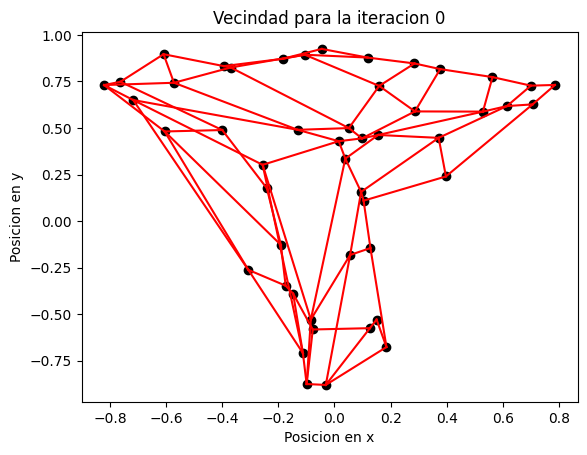

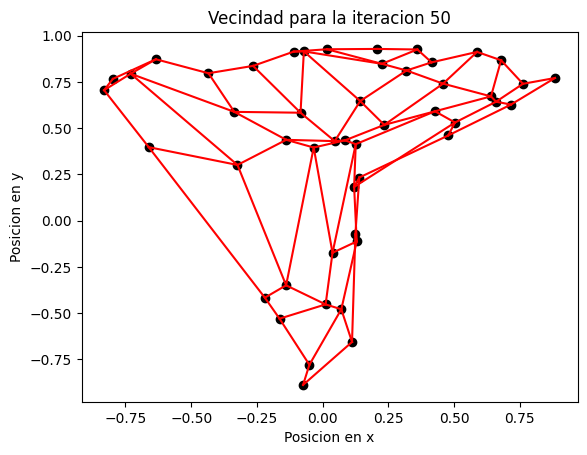

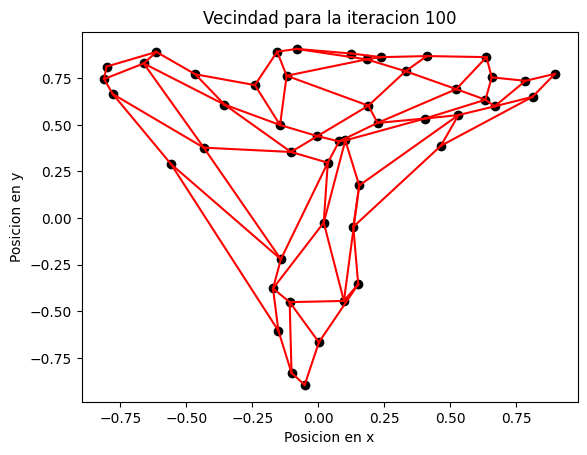

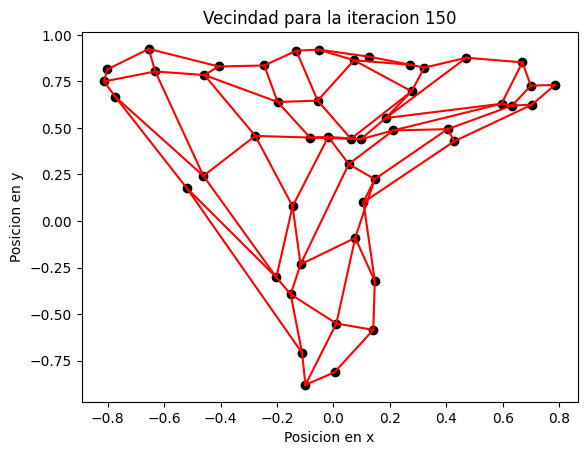

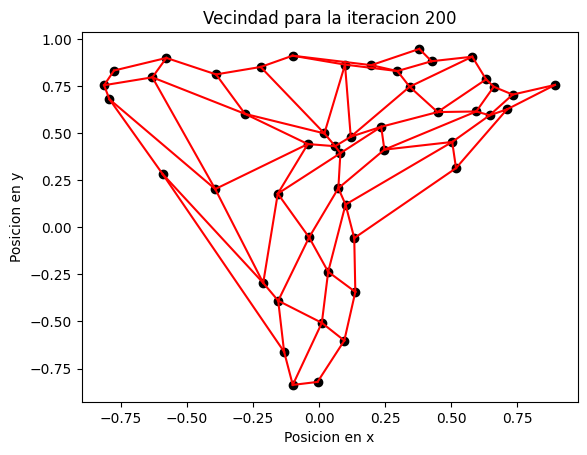

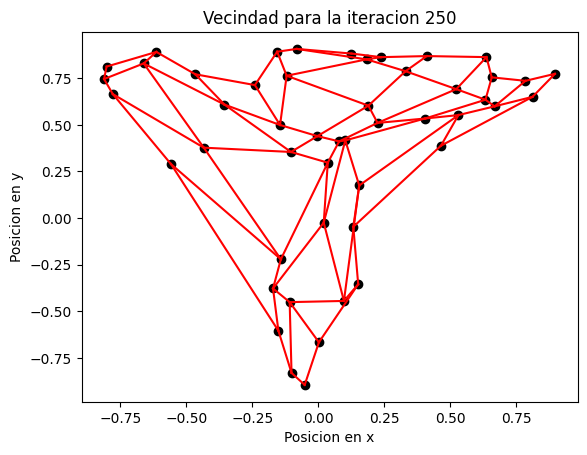

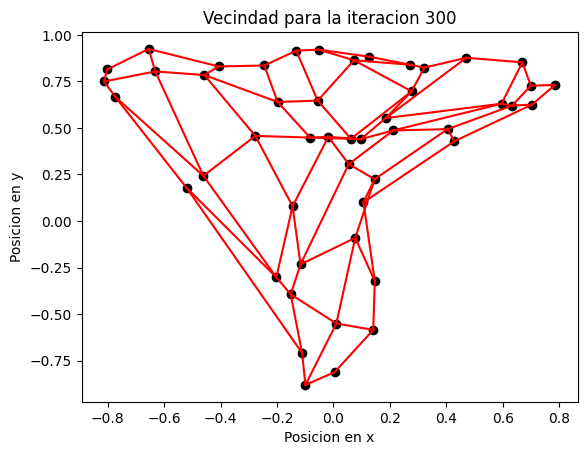

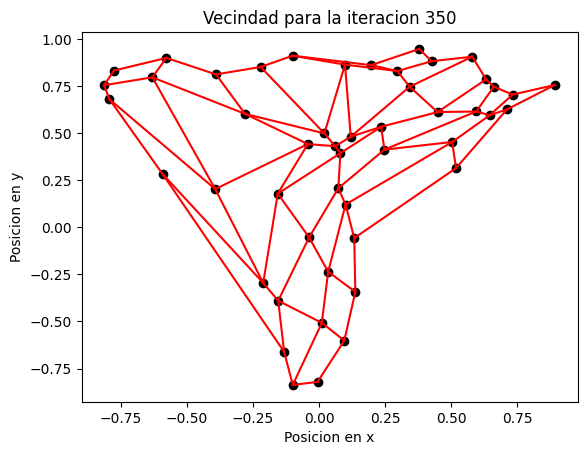

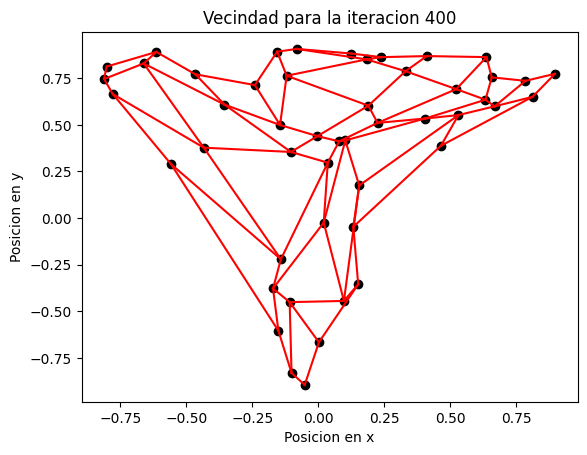

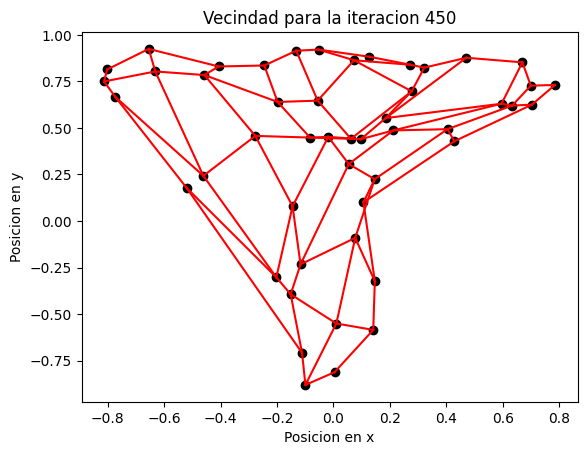

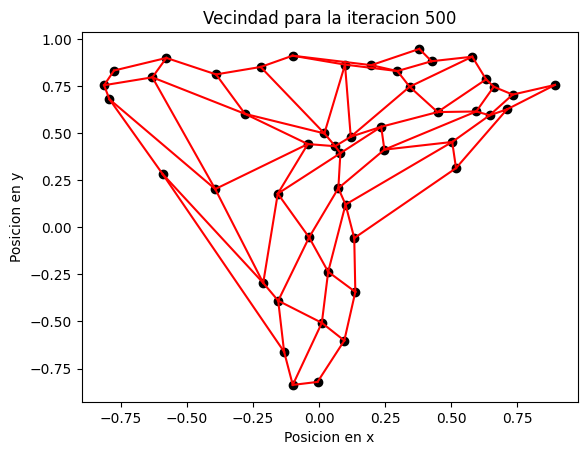

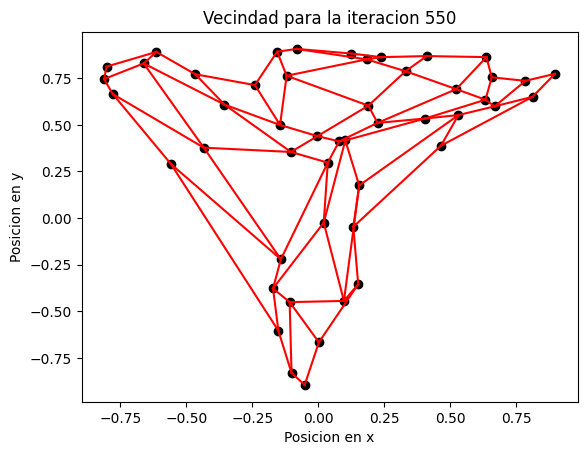

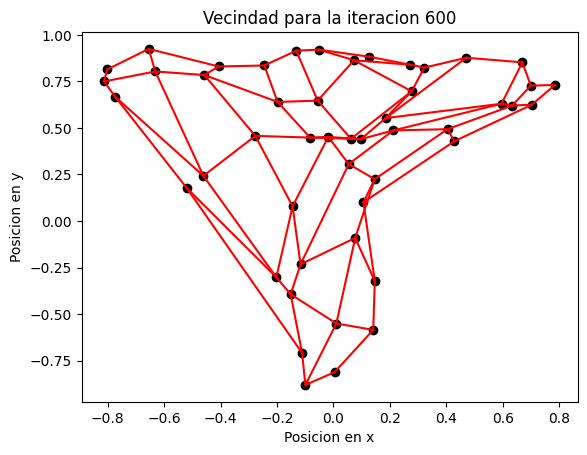

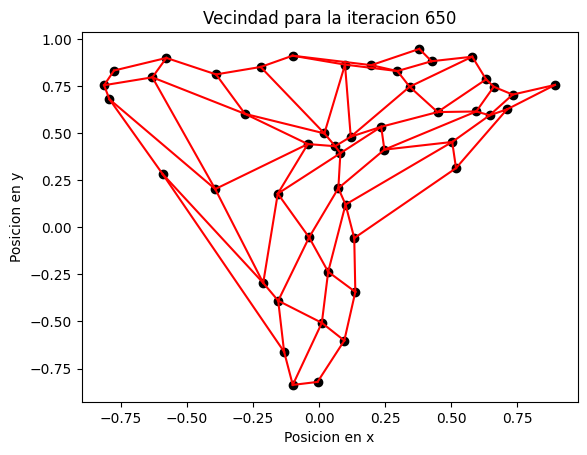

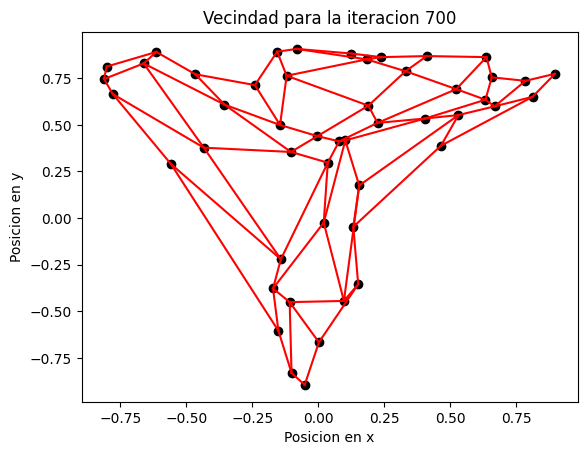

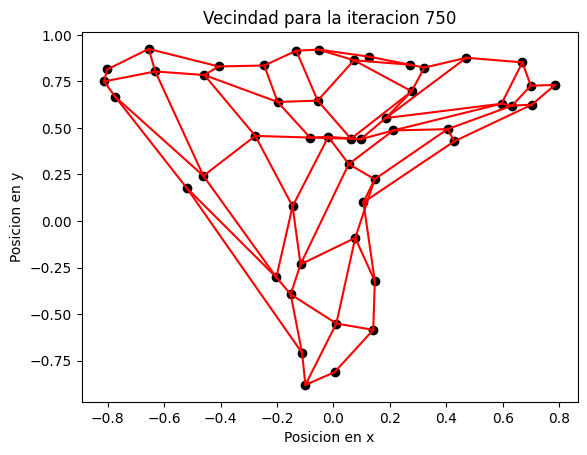

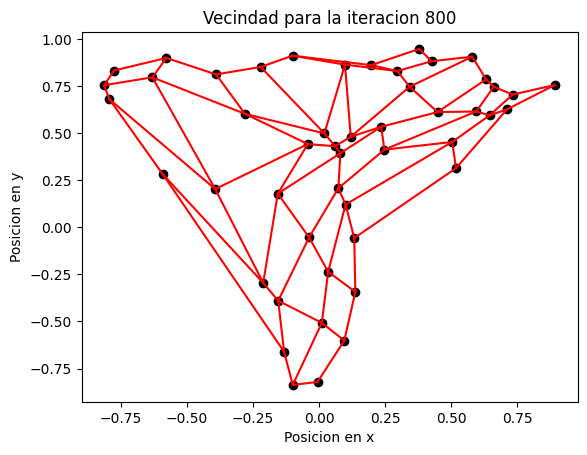

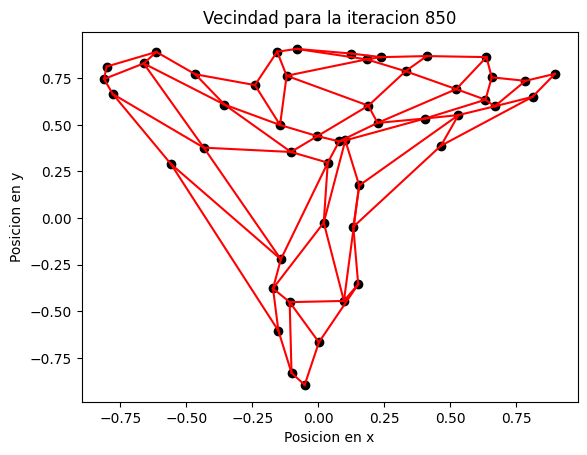

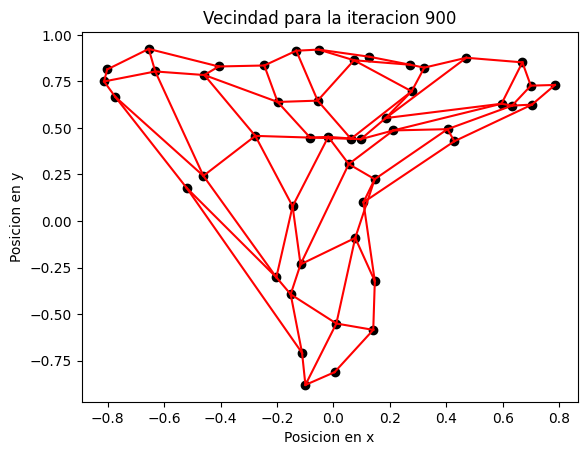

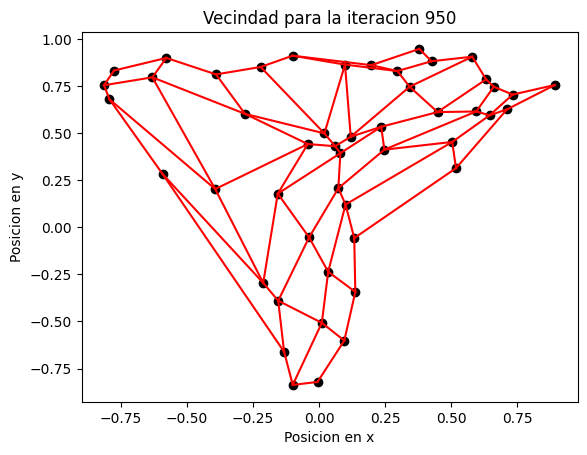

In [54]:
# le tengo que pasar a la funcion:
#  - cantidad maxima de iteraciones,
#  - la matriz de pesos
#  - la tasa de aprendizaje
#  - los datos de entrenamiento
#  - la cantidad de datos de entrenamiento
#  - distancia de la vecindad
#  - el tamaño que tiene la red de la vecindad
#  - y el tipo de red que es: para tipo==0 tenemos una red en matriz, sino es una vecindad en columna
iter_max = 1000
dist_vecindad = 2
tasa1 = 0.2*np.ones(iter_max)
dimension_te = len(datos_te[0])
tipo_ej1 = 0
pesos_ej1 = crear_pesos(red_size,dimension_te,tipo=tipo_ej1)
som_fit(iter_max,pesos_ej1,tasa1,datos_te,data_size_te,dist_vecindad,red_size,tipo=tipo_ej1)

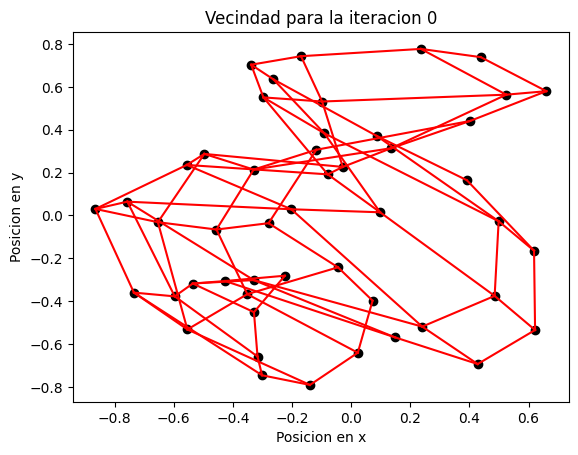

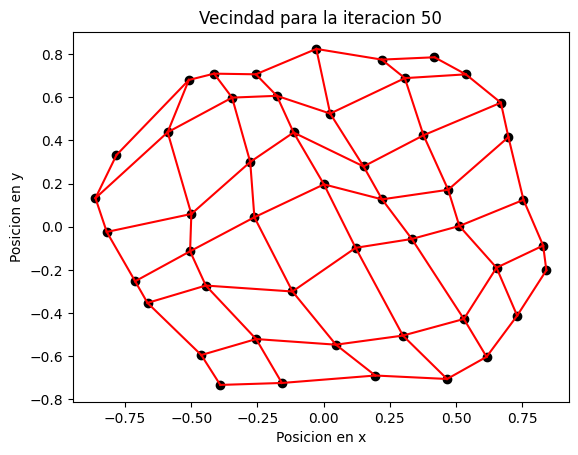

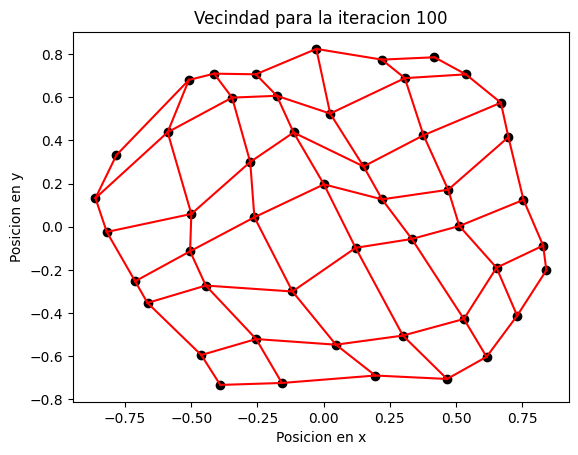

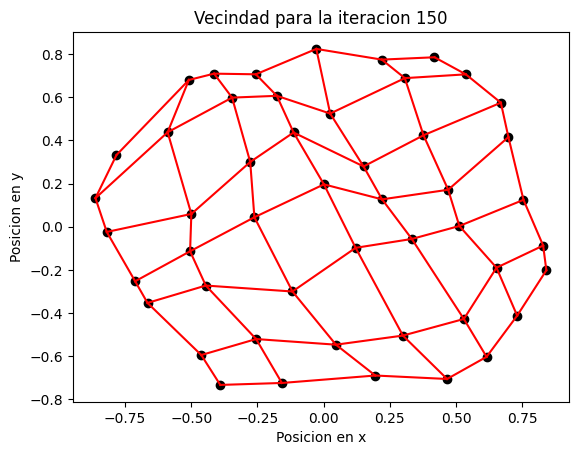

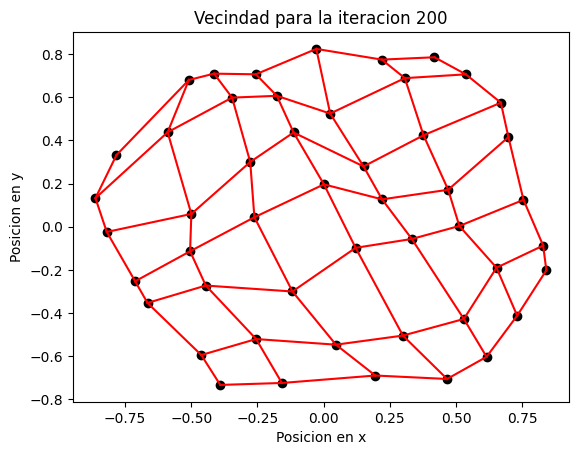

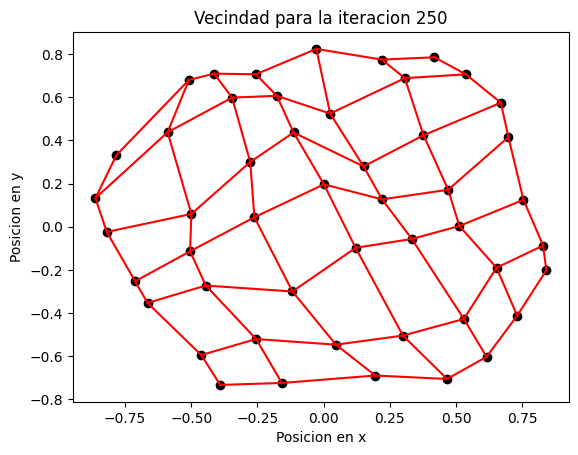

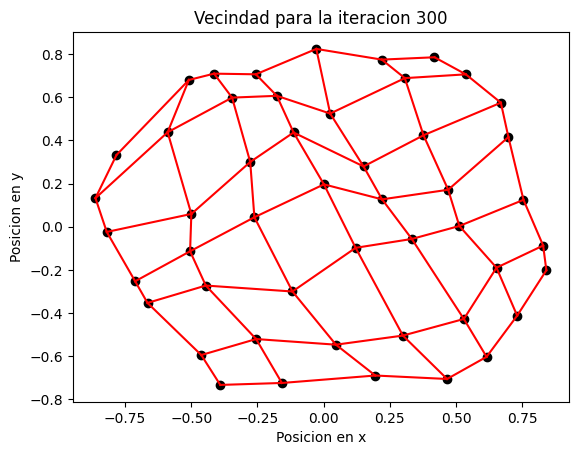

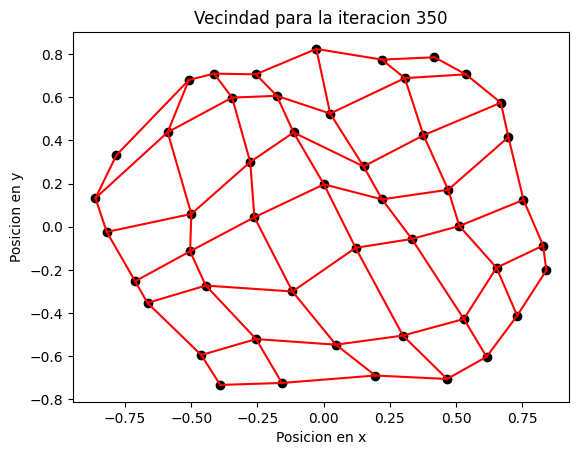

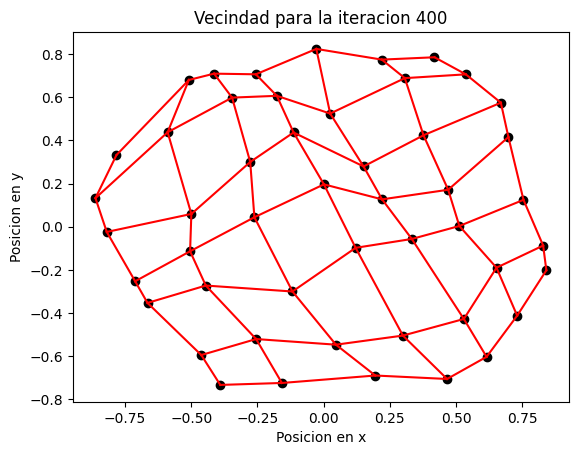

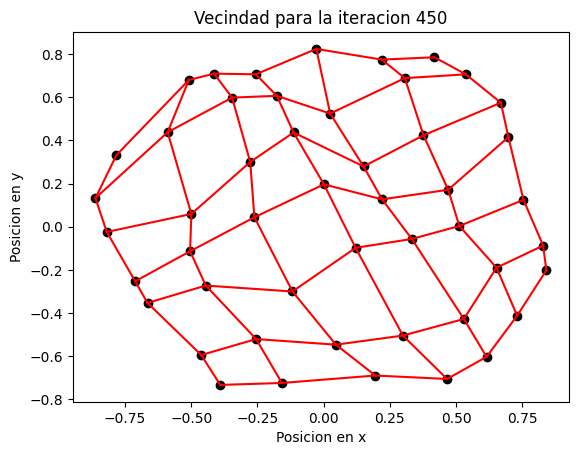

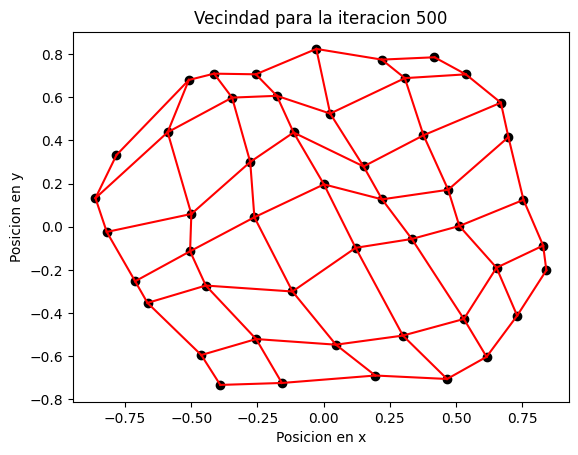

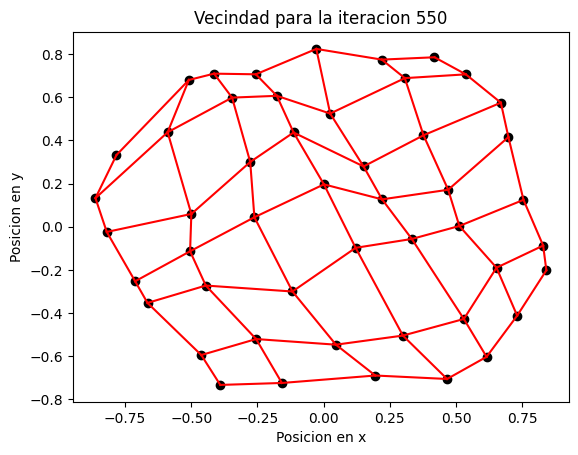

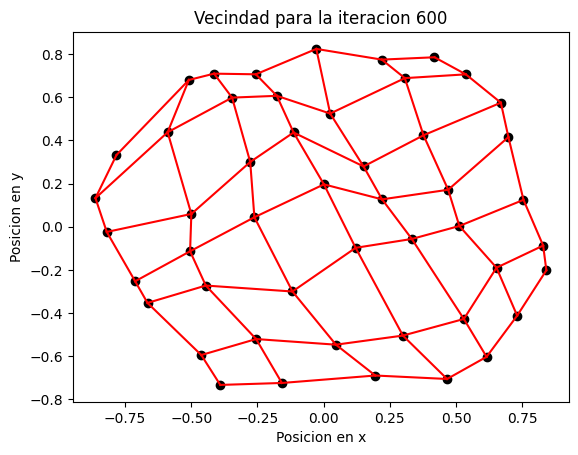

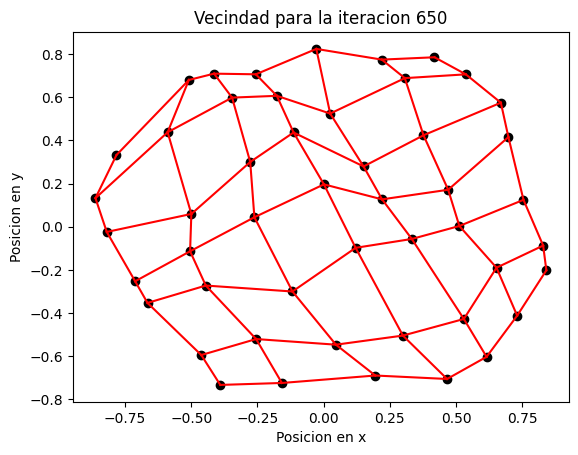

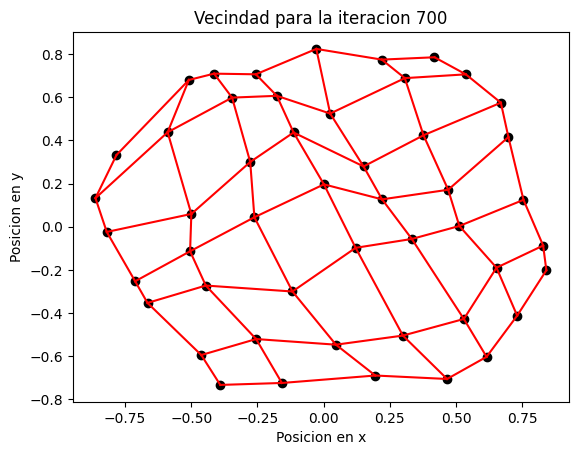

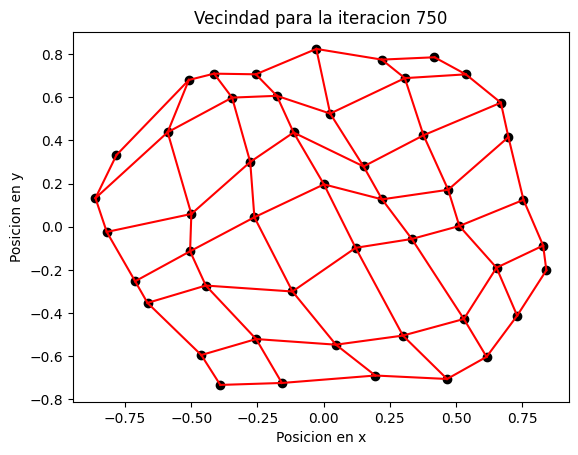

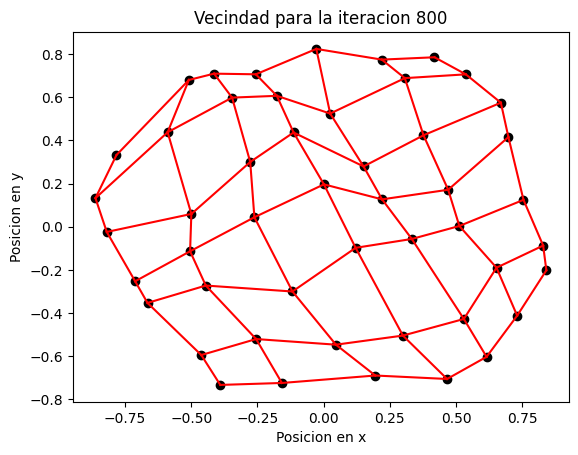

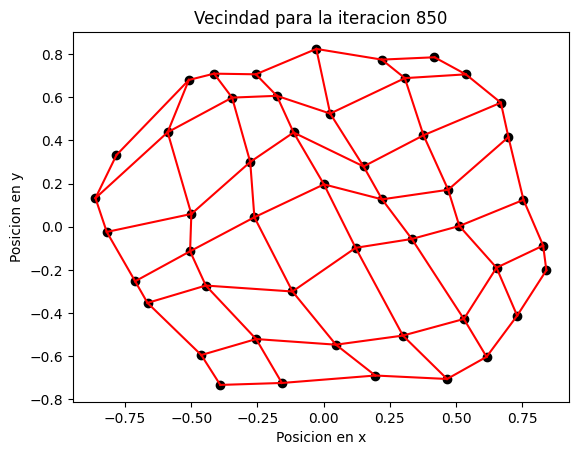

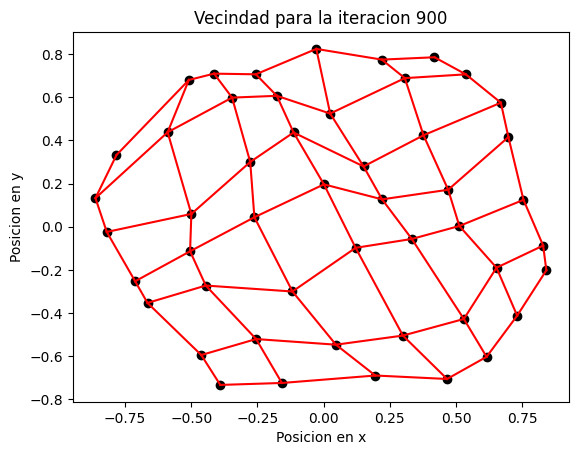

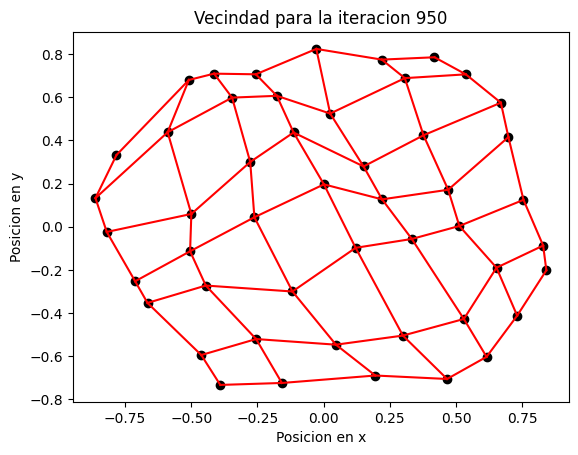

In [63]:
iter_max = 1000
dist_vecindad = 2
tasa1 = 0.1*np.ones(iter_max)
dimension_circulo = len(datos_circulo[0])
pesos_ej1_circulo = crear_pesos(red_size,dimension_circulo,tipo=0)
som_fit(iter_max,pesos_ej1_circulo,tasa1,datos_circulo,data_size_circulo,dist_vecindad,red_size,tipo=0)

# Ejercicio 2:
Implemente el método de clustering k-medias sobre el conjunto de datos Iris (GTP2) y compare las soluciones obtenidas con las de un SOM en estos mismos datos con una matriz de contingencia.

In [74]:
datos_fit = np.genfromtxt("irisbin_trn.csv", delimiter="," , skip_header=1)
datos_test = np.genfromtxt("irisbin_tst.csv", delimiter="," , skip_header=1)

In [56]:
def formar_conjuntos(patrones,k):
  patrones_c = np.full(len(patrones),None)
  for i in np.arange(0,len(patrones)):
    patrones_c[i] = np.append(patrones[i],np.random.randint(low=0, high=k))
  return patrones_c

In [57]:
def centroide_cercano(patron,centroides):
  centroide = int(patron[-1:])
  dist = np.linalg.norm(patron[:-1] - centroides[centroide])
  for i in np.arange(0,len(centroides)):
    dist_nueva = np.linalg.norm(patron[:-1] - centroides[i])
    if dist_nueva < dist:
      centroide = i
  return centroide

In [58]:
def calcular_centroides(patrones,k):
  centroides = np.full(k,None)
  for i in np.arange(0,k):
    centroides[i] = np.zeros(len(patrones[0][:-1]))
  contadores = np.full(k,0)
  for i in np.arange(0,len(patrones)):
    c = int(patrones[i][-1:])
    centroides[c] = np.add(centroides[c],patrones[i][:-1])
    contadores[c]+=1
  for i in np.arange(0,k):
    centroides[i] = centroides[i]/contadores[i]
  return centroides

In [76]:
# k medias por lotes
def fit_rbf(patrones,k):
  bandera = True
  # 1. Inicialización: se forman los k conjuntos Cj(0) con patrones xl elegidos al aleatoriamente.
  # para cada estructura de patrón queda [datos patrón, centroide al que pertenece]
  patrones_c = formar_conjuntos(patrones,k)
  while bandera == True:
    bandera = False
    # 2. Se calculan los centroides
    centroides = calcular_centroides(patrones_c,k)
    # 3. Se reasignan los xl al Cj más cercano:
    for i in np.arange(0,len(patrones_c)):
      centroide = centroide_cercano(patrones_c[i],centroides)
      if centroide != patrones_c[i][-1:]:
        patrones_c[i][-1:] = centroide
        bandera = True
    # 4. Volver a 2 hasta que no se realicen reasignaciones
  return centroides

In [60]:
def gauss(x,u):
  g = np.full(len(u),None)
  for i in np.arange(0,len(u)):
    sig = np.var(u[i])
    g[i] = np.exp(-np.linalg.norm(x-u[i],2)/(2*sig**2))
  return g

In [61]:
def corregir_salida(y):
  i_max = np.argmax(y)
  y_corregido = np.ones(len(y))*(-1)
  y_corregido[i_max] = 1
  return y_corregido

In [104]:
def fit_salidas(centroides,patrones,size_salida,epocas_max,salidas_deseadas,tasa,umbral_error):
  w = np.random.rand(size_salida,len(centroides)+1)-0.5
  print('pesos ',w)
  epoca = 0; errores_epocas = np.zeros(epocas_max);
  while (epoca < epocas_max):
    for i in np.arange(0,len(patrones)):
      x = gauss(patrones[i],centroides)
      x = np.insert(x,0,-1)
      y = np.dot(w,x)
      # y = corregir_salida(y)
      error = y - salidas_deseadas[i]
      w = w - tasa*np.outer(error,x)

    # evaluo desempeño
    contador_error = 0; suma = 0;
    for i in np.arange(0,len(patrones)):
      x = gauss(patrones[i],centroides)
      x = np.insert(x,0,-1)
      y = np.dot(w,x)
      error = np.sum((y - salidas_deseadas[i])**2)/2
      suma+=error
      y_final = corregir_salida(y)
      if (np.array_equal(y_final,salidas_deseadas[i]) != True):
        contador_error+=1
    #print("contador e ",contador_error)
    if ( contador_error/len(patrones) < umbral_error):
      break
    errores_epocas[epoca] = suma/len(patrones)
    epoca+=1
  return w,errores_epocas

In [96]:
# cantidad de conjuntos
k = 3
# patrones del entrenamiento
patrones_iris = datos_fit[:,:-3]

# entrenamos las rbf primero
centroides = fit_rbf(patrones_iris,k)
print('centroides: ',centroides)

centroides:  [array([5.40869565, 3.79565217, 1.42173913, 0.23478261])
 array([4.7952381 , 3.08571429, 1.44761905, 0.2952381 ])
 array([6.17121212, 2.91363636, 4.9530303 , 1.69393939])]


In [105]:
# entrenamos la capa de saldia
salidas_deseadas = datos_fit[:,-3:]
w,errores_epoca = fit_salidas(centroides,patrones_iris,3,300,salidas_deseadas,0.1,0.01)

pesos  [[-0.44200556 -0.15858174 -0.35795067 -0.34229122]
 [-0.34555043 -0.07148666 -0.2620343   0.32839353]
 [-0.11574822 -0.26231704  0.2046493  -0.47911351]]


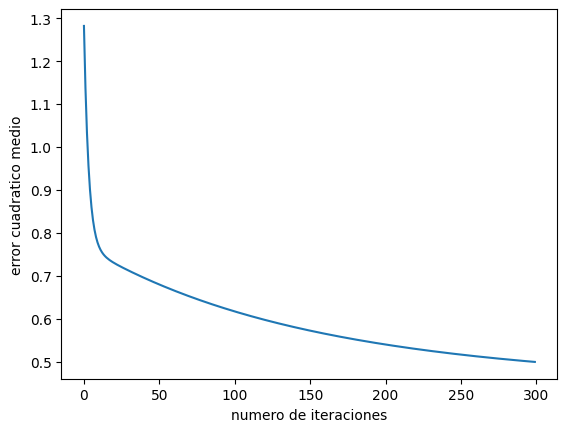

In [109]:
plt.plot(errores_epoca)
plt.ylabel('error cuadratico medio')
plt.xlabel('numero de iteraciones')
plt.show()

In [ ]:
from sklearn import metrics
# sklearn.metrics.cluster.contingency_matrix

x_test = datos_test[:,:-3]
y_test = datos_test[:,-3:]

# Ejercicio 3:
Pruebe varios valores de k (por ejemplo entre 2 y 10) para el conjunto de datos Iris, calcule para cada k una métrica de clustering (con sklearn) y encuentre el k óptimo para k-medias.